In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

Prob1: Tensile Strength Check od Paper

In [27]:
fivepercent = [7, 8, 15, 11, 9, 10]
tenpercent = [12, 17, 13, 18, 19, 15]
fifteenpercent = [14, 18, 19, 17, 16, 18]
twentypercent = [19, 25, 22, 23, 18, 20]

<function matplotlib.pyplot.show(*args, **kw)>

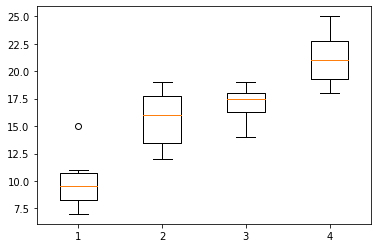

In [28]:
box_plot_data = [fivepercent, tenpercent, fifteenpercent, twentypercent]
plt.boxplot(box_plot_data)
plt.show

ANOVA Table

In [29]:
1 - scipy.stats.f.cdf(19.6, 3, 20)

3.599599239012541e-06

In [30]:
scipy.stats.f.ppf(1-0.01, dfn = 3, dfd = 20)

4.938193382310539

In [31]:
scipy.stats.f_oneway(fivepercent, tenpercent, fifteenpercent, twentypercent)

F_onewayResult(statistic=19.605206999573184, pvalue=3.5925782584743027e-06)

Prob1: Solve the above problem when data is in an Excel file

In [34]:
df = pd.read_excel('G:/IIT - nptel/Data Analytics with Python/data/concentration.xlsx'
)
df

,concentration5,concentration10,concentration15,concentration20
0,7,12,14,19
1,8,17,18,25
2,15,13,19,22
3,11,18,17,23
4,9,19,16,18
5,10,15,18,20


In [38]:
data_r1 = pd.melt(df.reset_index(), id_vars = ['index'], value_vars = ['concentration5', 'concentration10', 'concentration15', 'concentration20'])
data_r1.columns = ['index', 'treatments', 'value']
data_r1

,index,treatments,value
0,0,concentration5,7
1,1,concentration5,8
2,2,concentration5,15
3,3,concentration5,11
4,4,concentration5,9
5,5,concentration5,10
6,0,concentration10,12
7,1,concentration10,17
8,2,concentration10,13
9,3,concentration10,18


In [39]:
model = ols('value ~ C(treatments)', data = data_r1).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Tue, 03 Mar 2020   Prob (F-statistic):           3.59e-06
Time:                        11:26:27   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           15.6667      1.041     15.042      0.000      13.494      17.839
C(treatments)[T.concentration15]     1.3333      1.473      0.905      0.376      -1.739       4.406
C(treatments)[T.concentration20]     5.5000      1.473      3.734      0.001       2.428       8.572
C(treatments)[T.concentration5]     -5.6667      1.473     -3.847      0.001      -8.739      -2.594
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
aov_table = sm.stats.anova_lm(model, typ = 1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


Prob1: Computing LSD for above problem

In [44]:
import math
t = -1 * scipy.stats.t.ppf(0.025, 20)
n = 6
MSE = 6.508333
lsd = t * math.sqrt(2 * MSE/n)
lsd

3.072422588325206

Prob1: Solving the above problem using Tukey Kramer Procedure

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data_r1['value'], data_r1['treatments'])
mcresult = mc.tukeyhsd(0.05)
mcresult.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
concentration10,concentration15,1.3333,0.7827,-2.7894,5.4561,False
concentration10,concentration20,5.5,0.0066,1.3773,9.6227,True
concentration10,concentration5,-5.6667,0.0051,-9.7894,-1.5439,True
concentration15,concentration20,4.1667,0.047,0.0439,8.2894,True
concentration15,concentration5,-7.0,0.001,-11.1227,-2.8773,True
concentration20,concentration5,-11.1667,0.001,-15.2894,-7.0439,True


Prob2: Tensile Strength Check of Cotton 

In [48]:
df3 = pd.read_excel('G:/IIT - nptel/Data Analytics with Python/data/cotton weight.xlsx')
data1 = pd.melt(df3.reset_index(), id_vars = ['index'], value_vars = ['cotwt.15', 'cotwt.20', 'cotwt.25', 'cotwt.30', 'cotwt.35'])
data1.columns = ['id', 'treatments', 'value']
data1

,id,treatments,value
0,0,cotwt.15,7
1,1,cotwt.15,7
2,2,cotwt.15,15
3,3,cotwt.15,11
4,4,cotwt.15,9
5,0,cotwt.20,12
6,1,cotwt.20,17
7,2,cotwt.20,12
8,3,cotwt.20,18
9,4,cotwt.20,18


In [50]:
mc = MultiComparison(data1['value'], data1['treatments'])
mcresults = mc.tukeyhsd(0.05)
mcresults.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
cotwt.15,cotwt.20,5.6,0.0385,0.2266,10.9734,True
cotwt.15,cotwt.25,7.8,0.0026,2.4266,13.1734,True
cotwt.15,cotwt.30,11.8,0.001,6.4266,17.1734,True
cotwt.15,cotwt.35,1.0,0.9,-4.3734,6.3734,False
cotwt.20,cotwt.25,2.2,0.7148,-3.1734,7.5734,False
cotwt.20,cotwt.30,6.2,0.0189,0.8266,11.5734,True
cotwt.20,cotwt.35,-4.6,0.1165,-9.9734,0.7734,False
cotwt.25,cotwt.30,4.0,0.2102,-1.3734,9.3734,False
cotwt.25,cotwt.35,-6.8,0.0091,-12.1734,-1.4266,True
cotwt.30,cotwt.35,-10.8,0.001,-16.1734,-5.4266,True
